# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Step 1: Upload the dataset to Google Colab

In [ ]:
data = pd.read_csv('/content/Iris.csv')

# Step 2: Explore and preprocess the dataset

In [ ]:
# Display first few rows to understand the data
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Drop the 'Id' column as it's not a feature
data = data.drop('Id', axis=1)

In [ ]:
# Define features (X) and target (y)
X = data.drop('Species', axis=1)  # All columns except 'Species'
y = data['Species']  # Target column (Iris-setosa, Iris-versicolor, Iris-virginica)

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Experiment with different K values


Accuracy for K=1: 0.9778


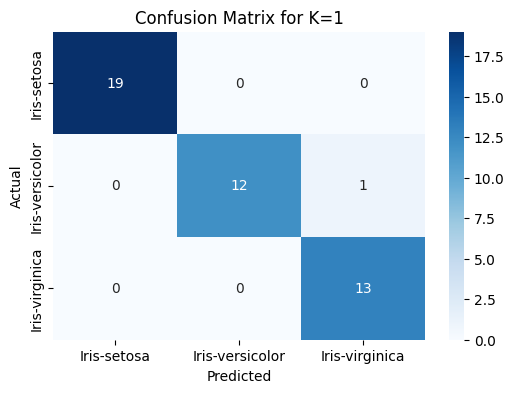


Accuracy for K=3: 1.0000


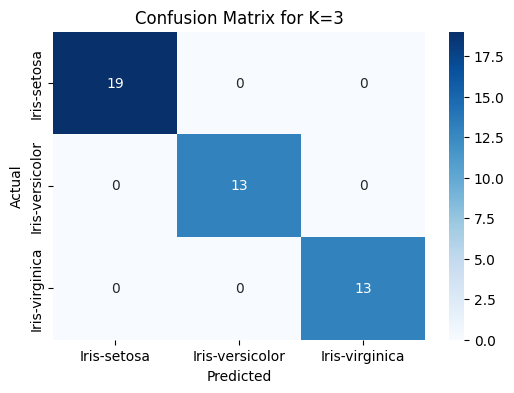


Accuracy for K=5: 1.0000


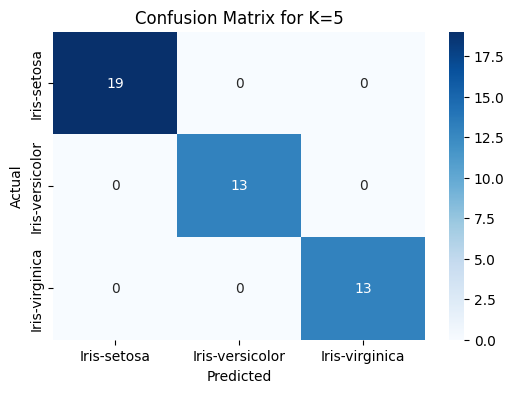


Accuracy for K=7: 1.0000


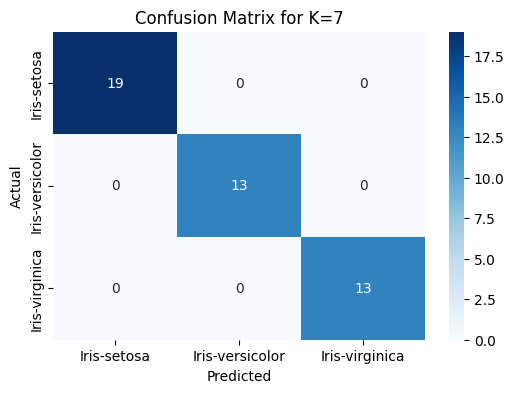


Accuracy for K=9: 1.0000


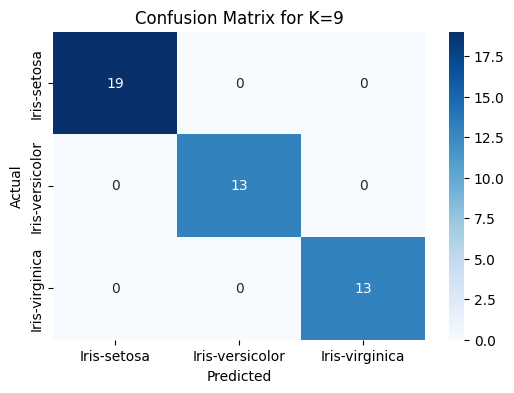


Accuracy for K=11: 1.0000


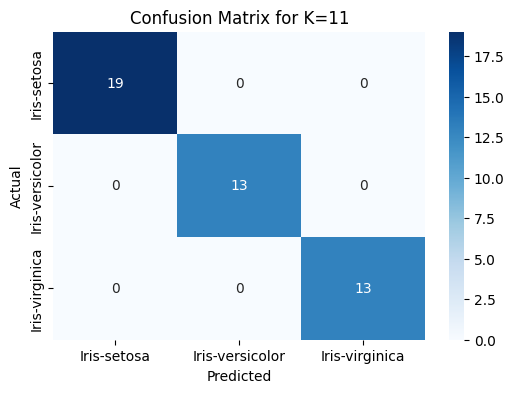


Accuracy for K=15: 1.0000


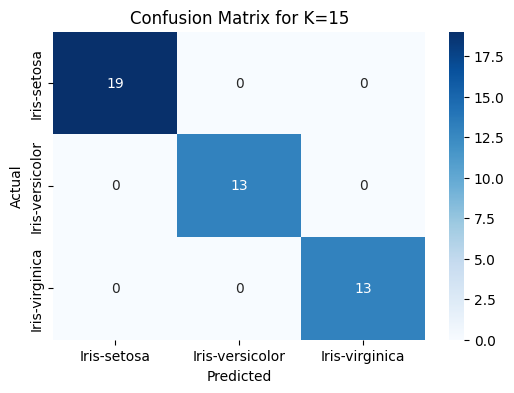

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print accuracy for this K
    print(f"\nAccuracy for K={k}: {accuracy:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.title(f'Confusion Matrix for K={k}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 4: Plot accuracy vs. K value

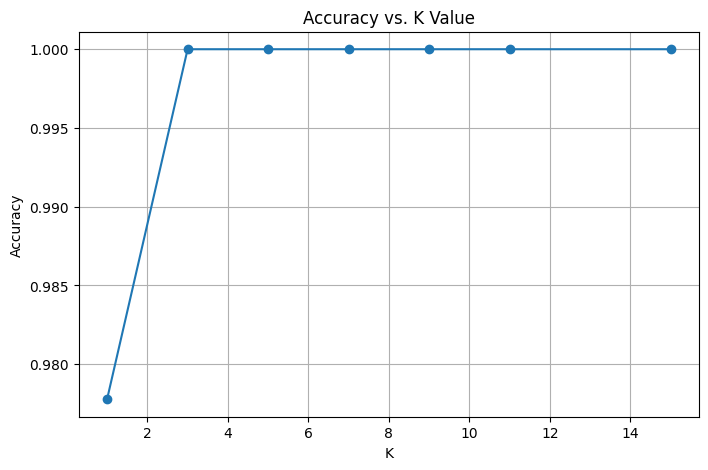

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Step 5: Visualize decision boundaries (using two features for simplicity)

In [ ]:
X_two_features = X_scaled[:, [2, 3]]  # PetalLengthCm and PetalWidthCm
X_train_2f, X_test_2f, y_train_2f, y_test_2f = train_test_split(X_two_features, y, test_size=0.3, random_state=42)

In [ ]:
# Create mesh grid for decision boundary
x_min, x_max = X_two_features[:, 0].min() - 1, X_two_features[:, 0].max() + 1
y_min, y_max = X_two_features[:, 1].min() - 1, X_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

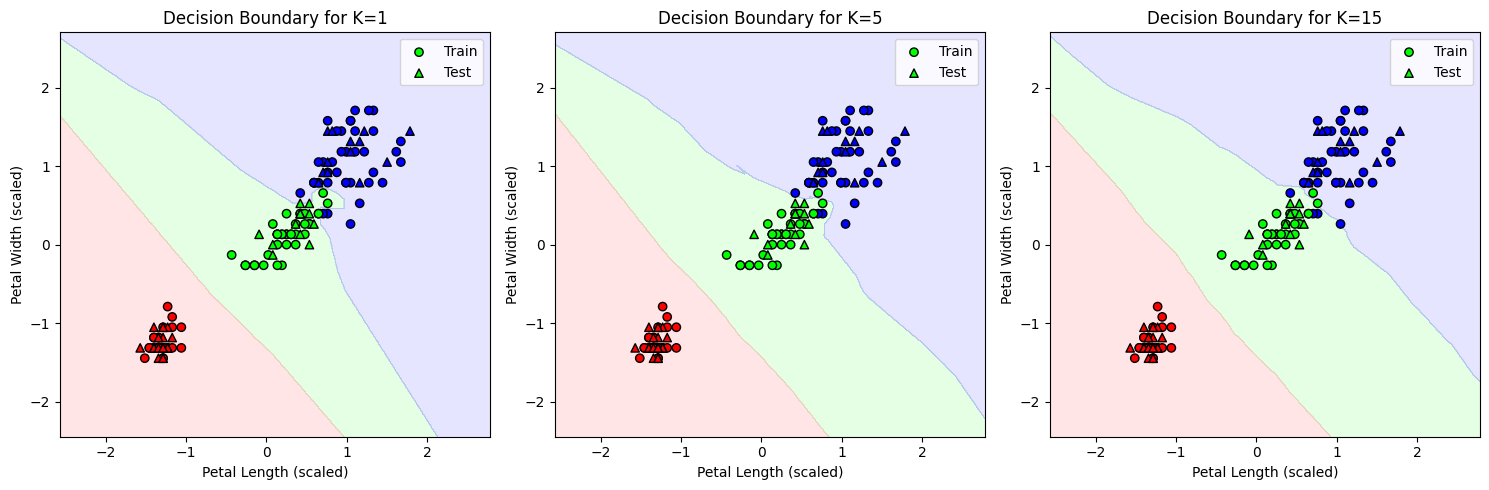

In [ ]:
# Plot decision boundaries for selected K values
k_values_to_plot = [1, 5, 15]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values_to_plot, 1):
    # Train KNN with two features
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2f, y_train_2f)

    # Predict over the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([knn.classes_.tolist().index(z) for z in Z])  # Convert labels to indices
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.3)
    plt.scatter(X_train_2f[:, 0], X_train_2f[:, 1], c=[{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[label] for label in y_train_2f],
                cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', label='Train')
    plt.scatter(X_test_2f[:, 0], X_test_2f[:, 1], c=[{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[label] for label in y_test_2f],
                cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', marker='^', label='Test')
    plt.title(f'Decision Boundary for K={k}')
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.legend()

plt.tight_layout()
plt.show()